# Mid Term Project
by:
Srini and Denny

<a id='content'></a>
### Table of content
<a href='#setup'>setup libraries</a>
- pandas, numpy
- sklearn

<a href='#helper_function'>helper functions</a>
- plot data

<a href='#data_functions'>data functions</a>
- interquartile
- droping tables
- transformation

<a href='#raw_data'>raw data</a>
- loading raw data
<li>
    <a href='#plot_raw'>plot raw data</a>
    <li>
    <a href='#heatmap'>heatmap</a>
    </li>
</li>

<a href='#analyze_raw_data'>analyze Raw Data</a>

<a href='#plot_regression'>plot regression graph</a>

<a href='#feature_importance'>feature importance</a>

<a href='#content'>back to content list</a>
<a id='setup'></a> 
### Setup

In [2582]:
# import libraries

# dealing with data libs
import pandas as pd
import numpy as np


# dealing with date 
import datetime

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # progressbar for looping


# machine learning libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm





<a href='#content'>back to content list</a>
<a id='helper_function'></a> 
### Helper Functions

In [2583]:
# ploting all numerical data from dataframe

def plot_numeric(data):
    for i in data._get_numeric_data():
        fig , ax = plt.subplots(1,2, figsize=(15,7))
        plt.title(i)
        sns.boxplot(x=data[i], ax=ax[0])
        sns.histplot(data[i], ax=ax[1])

        plt.show()

<a id='data_functions'></a>
<a href='#content'>back to content list</a>
### Functions for optional data handling:

#### option 1 Interquartile

In [2584]:
# rip data in interquartile range

def reduce_to_interquartile(data: pd.DataFrame, name: list) -> pd.DataFrame:
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    filter = (data[name] >= Q1 - 1.5 * IQR) & (data[name] <= Q3 + 1.5 *IQR)
    data=data.loc[filter] 

    return data

#### option 2 remove

In [2585]:
# remove column

def remove_column(data: pd.DataFrame, name: list) -> pd.DataFrame:
    data = data.drop(columns=name, inplace= True)

    return data

#### create dummy table for categorie

In [2586]:
def create_dummies_for_categorie(data, name):
    data = pd.get_dummies(data, columns=[name], drop_first = True)
    return data

#### perform transformation operation on data

In [2587]:
# transform operation

pwr = PowerTransformer()
robust = RobustScaler()
minMax = MinMaxScaler()

def aggregate_transform(data: pd.DataFrame, name: str, operator: str = 'pwr', lamda_value: float = 0)-> pd.DataFrame:
    transformer = pwr

    if operator == 'pwr':
        transformer = pwr
    elif operator == 'minmax':
        transformer = minMax
    elif operator == 'robust':
        transformer = robust
    if lamda_value != 0:
        transformer.lambdas_ = lamda_value
    data[name] = transformer.fit_transform(data[name].to_numpy().reshape(-1,1))
    return data


#### plot function 

In [2588]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line
def plot_train_vs_test(x_train, y_pred, x_test, y_test, y_pred_train):
    fig, ax = plt.subplots(2,3,figsize=(18,10))
    ax[0,0].plot(y_pred, y_test, 'o',color='red')
    ax[0,0].set_xlabel("y_test")
    ax[0,0].set_ylabel("y_pred")
    ax[0,0].set_title("Test Set -Predicted vs real")

    # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
    # It resembles a normal distribution?
    ax[0,1].hist(y_test - y_pred, color='red')
    ax[0,1].set_xlabel("Test y-y_pred")
    ax[0,1].set_title("Test Set Residual histogram")

    ax[0,2].plot(y_pred,y_test - y_pred,"o", color='red')
    ax[0,2].set_xlabel("predited")
    ax[0,2].set_ylabel("residuals")
    ax[0,2].set_title("Residuals by Predicted")
    ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



    ax[1,0].plot(y_pred_train, y_train, 'o')
    ax[1,0].set_xlabel("y_train")
    ax[1,0].set_ylabel("y_pred_train")
    ax[1,0].set_title("Train set Predicted vs real")

    # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
    # It resembles a normal distribution?
    ax[1,1].hist(y_train - y_pred_train)
    ax[1,1].set_xlabel("Train y-y_pred")
    ax[1,1].set_title("Train Residual histogram")

    ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
    ax[1,2].set_xlabel("predited")
    ax[1,2].set_ylabel("residuals")
    ax[1,2].set_title("Residuals by Predicted -- Train set")
    ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')
    

<a id='raw_data'></a>
<a href='#content'>back to content list</a>
### load raw data

In [2589]:
# load data and create work_copy

raw_data = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')

work_copy = raw_data.copy()


### Data review

In [2590]:
raw_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


<a id='plot_raw'></a>
<a href='#content'>back to content list</a>
### Plotting raw data

In [2591]:
# analyze raw data
# plot_numeric(work_copy)
#sns.pairplot(work_copy,diag_kind="kde")

<a id='heatmap'></a>
<a href='#content'>back to content list</a>

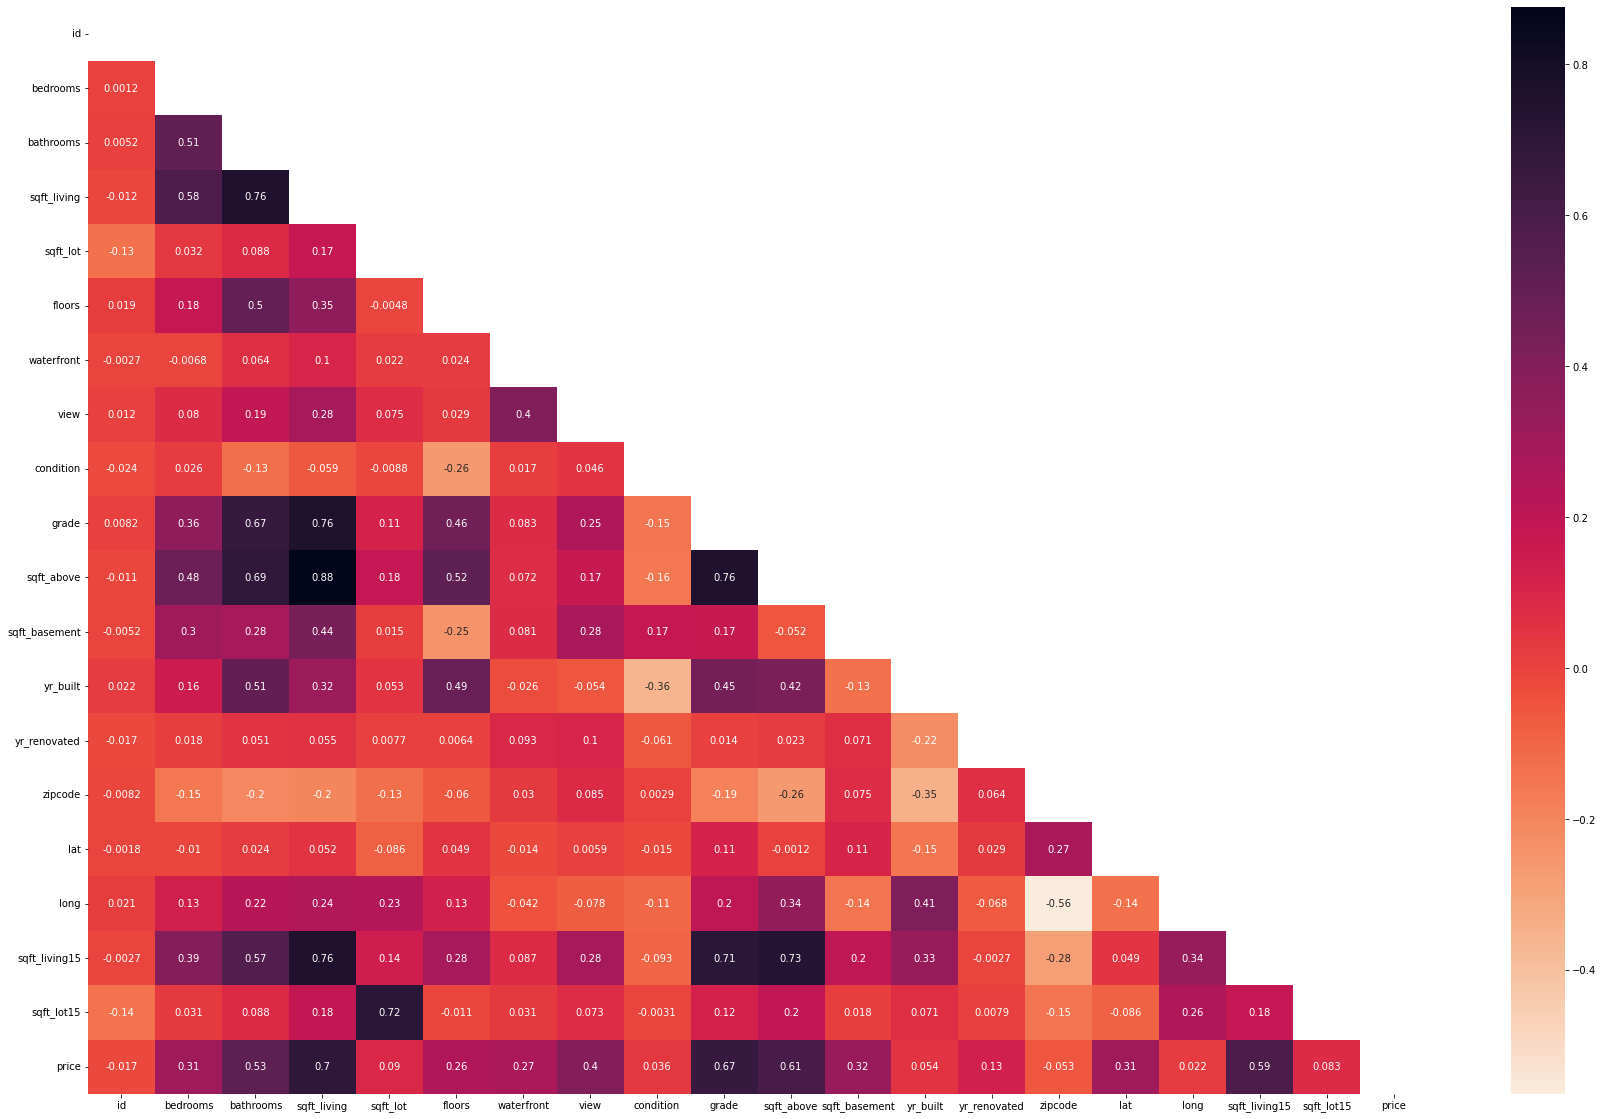

In [2592]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(work_copy._get_numeric_data().corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(work_copy._get_numeric_data().corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

<a id='analyze_raw_data'></a>
<a href='#content'>back to content list</a>
### **Data description:** 

> id -> will be removed as not mandatory
>
> bedrooms -> need adjustments as max 33 could be an outlayer, without -> normal distributed
>
> bathrooms -> max 8 needs to check, if its fits with connected sqft range ->
>
> sqft_living -> maybe recalculated in square meter to fit better in european perspective
>
> sqft_lot -> similar to sqft_living
>
> floors -> maybe changable to ordonal categorical
>
> waterfront -> set to categorical 
>
> view -> needs review why min to 75% is zero with an max of 4
>
> condition -> transform to ordonal categorical 0-5
>
> grade -> as descripted typical ordonal categorical 0-13
>
> sqft_above -> similar to sqft_living
>
> sqft_basement -> similar to sqft_living
> - as sqft_basement looks without zero numbers as normal distributed
> - ***ToDo:*** drop zero values from this column
> - create category 'has_basement'
> - fill all 'has_basement' where basement is included
>
> yr_build -> use as number or could be ordonal category when binning with steps e.g 5 years 1900-1905 ....
>
> zip code, lat and long -> skipt or could binning or clustered to regions 
>
> sqft_living15 and sqft_lot15 represents the average living and lot sqft of the closest 15 neiboorhouses





In [2593]:
# drop first not need data
work_copy.drop(columns=['id', 'date', 'sqft_lot', 'view', 'yr_renovated', 'sqft_lot15'], inplace=True)

# removed floors, sqft_living15, sqft_above

In [2594]:
# droping long and lat coordinates, as this location information is allready included in the zipcodes
#work_copy.drop(columns=['long', 'lat'], inplace=True)

work_copy.drop(columns=['long'], inplace=True)

In [2595]:
# test for dropping all to fill in an input value and receive an return price
#work_copy.drop(columns=['waterfront', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'sqft_basement', 'lat','zipcode', 'condition'], inplace=True)

In [2596]:
# interquartile sqft_living

work_copy =  work_copy[work_copy['bedrooms'] != 33]
work_copy = reduce_to_interquartile(data=work_copy, name='bedrooms')

In [2597]:
# basement has no real influence so i transform this to an binary has or has not field 0 or 1
work_copy['sqft_basement'].values[work_copy['sqft_basement'] != 0] = 1


In [2598]:
work_copy = create_dummies_for_categorie(work_copy, 'zipcode')

In [2599]:
work_copy = create_dummies_for_categorie(work_copy, 'grade')

In [2600]:
work_copy = create_dummies_for_categorie(work_copy, 'floors')

In [2601]:
work_copy = create_dummies_for_categorie(work_copy, 'bedrooms')

In [2602]:
work_copy = create_dummies_for_categorie(work_copy, 'condition')

In [2603]:
#plot_numeric(work_copy)

#sns.pairplot(work_copy,diag_kind="kde")

In [2604]:
work_copy.describe()

,bathrooms,sqft_living,waterfront,sqft_above,sqft_basement,yr_built,lat,sqft_living15,price,zipcode_98002,...,floors_2.5,floors_3.0,floors_3.5,bedrooms_3,bedrooms_4,bedrooms_5,condition_2,condition_3,condition_4,condition_5
count,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,2.106700e+04,21067.000000,...,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000
mean,2.108618,2070.654673,0.007310,1785.008069,0.390469,1971.408079,47.559582,1987.000475,5.374412e+05,0.008924,...,0.006740,0.028575,0.000285,0.466322,0.326672,0.075996,0.007452,0.650211,0.262448,0.078749
std,0.746090,889.352191,0.085188,812.864414,0.487867,29.210838,0.138986,682.127232,3.555173e+05,0.094046,...,0.081825,0.166614,0.016874,0.498876,0.469007,0.264997,0.086007,0.476914,0.439975,0.269353
min,0.500000,440.000000,0.000000,440.000000,0.000000,1900.000000,47.155900,399.000000,7.800000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1430.000000,0.000000,1200.000000,0.000000,1952.000000,47.469200,1490.000000,3.225000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.250000,1910.000000,0.000000,1560.000000,0.000000,1975.000000,47.571400,1840.000000,4.500000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.500000,2530.000000,0.000000,2200.000000,1.000000,1997.000000,47.678200,2360.000000,6.400000e+05,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,10040.000000,1.000000,8020.000000,1.000000,2015.000000,47.777600,6210.000000,7.060000e+06,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### First Approach with unfilterd data

In [2605]:
label = work_copy['price']
work_copy.drop(columns='price', inplace=True)

In [2606]:
x_train, x_test, y_train, y_test = train_test_split(work_copy, label, test_size= 0.20, random_state= 42)

In [2607]:
x_train.describe()

,bathrooms,sqft_living,waterfront,sqft_above,sqft_basement,yr_built,lat,sqft_living15,zipcode_98002,zipcode_98003,...,floors_2.5,floors_3.0,floors_3.5,bedrooms_3,bedrooms_4,bedrooms_5,condition_2,condition_3,condition_4,condition_5
count,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,...,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000
mean,2.105471,2069.237465,0.007714,1782.317748,0.390850,1971.392512,47.559247,1984.899246,0.008604,0.012639,...,0.006646,0.028304,0.000237,0.467573,0.325995,0.075951,0.007239,0.650745,0.261140,0.079808
std,0.743450,885.974953,0.087491,807.961258,0.487955,29.234035,0.138697,681.530864,0.092360,0.111713,...,0.081252,0.165844,0.015405,0.498962,0.468759,0.264927,0.084777,0.476749,0.439269,0.271003
min,0.500000,440.000000,0.000000,440.000000,0.000000,1900.000000,47.155900,399.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1430.000000,0.000000,1200.000000,0.000000,1952.000000,47.468700,1490.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.250000,1910.000000,0.000000,1560.000000,0.000000,1975.000000,47.570700,1840.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.500000,2540.000000,0.000000,2200.000000,1.000000,1997.000000,47.677900,2360.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,10040.000000,1.000000,8020.000000,1.000000,2015.000000,47.777600,6110.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2608]:
scaler_train = StandardScaler().fit(x_train)
#scaler_train = RobustScaler().fit(x_train)
#scaler_train = MinMaxScaler().fit(x_train)



scaler_train.transform(x_train)
scaler_train.transform(x_test)


array([[ 0.53068922,  0.05729738, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.86696932,  0.41849212, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.19440912, -0.12329999, -0.08816873, ..., -1.36500359,
         1.68206925, -0.29449861],
       ...,
       [ 0.53068922,  0.04601004, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.53068922,  0.29433143, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.53068922, -0.60865543, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861]])

In [2609]:
model_l = LinearRegression(n_jobs=-1)
#model_l = Lasso()

model_l.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [2610]:
y_pred_train = model_l.predict(x_train)
y_pred_test = model_l.predict(x_test)


In [2611]:
x_train_sm = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train_sm).fit()

model.summary()


/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     806.8
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:50:28   Log-Likelihood:            -2.2482e+05
No. Observations:               16853   AIC:                         4.498e+05
Df Residuals:                   16754   BIC:                         4.506e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.014e+07   3.18e+06     -3.188      0.001   -1.64e+07   -3.91e+06
bathrooms      3.155e+04   2890.604     10.914      0.000    2.59e+04    3.72e+04
sqft_living     149.3292      5.430     27.503      0.000     138.687     159.972
waterfront     8.083e+05   1.39e+04     58.252      0.000    7.81e+05    8.35e+05
sqft_above       14.8331      6.054      2.450      0.014       2.967      26.700
sqft_basement -2.221e+04   4639.312     -4.788      0.000   -3.13e+04   -1.31e+04
yr_built       -611.5428     71.662     -8.534      0.000    -752.008    -471.078
lat            2.364e+05   6.72e+04      3.520      0.000    1.05e+05    3.68e+05
sqft_living15    27.9639      3.075      9.095      0.000      21.937      33.991
zipcode_98002  6512.4137   1.55e+04      0.421      0.674   -2.38e+04    3.69e+04
zipcode_98003 -7578.0638   1.37e+04     -0.552      0.581   -3.45e+04    1.94e+04
zipcode_98004  6.931e+05   2.46e+04     28.216      0.000    6.45e+05    7.41e+05
zipcode_98005  2.142e+05    2.6e+04      8.226      0.000    1.63e+05    2.65e+05
zipcode_98006  1.896e+05   2.07e+04      9.176      0.000    1.49e+05     2.3e+05
zipcode_98007  1.657e+05   2.67e+04      6.205      0.000    1.13e+05    2.18e+05
zipcode_98008  1.913e+05   2.46e+04      7.778      0.000    1.43e+05    2.39e+05
zipcode_98010  6.699e+04   1.91e+04      3.499      0.000    2.95e+04    1.05e+05
zipcode_98011  1.396e+04   3.36e+04      0.415      0.678    -5.2e+04    7.99e+04
zipcode_98014  1.735e+04   3.02e+04      0.574      0.566   -4.19e+04    7.66e+04
zipcode_98019 -1.623e+04   3.27e+04     -0.496      0.620   -8.03e+04    4.79e+04
zipcode_98022  4.627e+04    1.6e+04      2.893      0.004    1.49e+04    7.76e+04
zipcode_98023 -3.724e+04   1.18e+04     -3.153      0.002   -6.04e+04   -1.41e+04
zipcode_98024  1.069e+05   2.76e+04      3.871      0.000    5.28e+04    1.61e+05
zipcode_98027  1.063e+05    1.9e+04      5.604      0.000    6.91e+04    1.44e+05
zipcode_98028   1.65e+04   3.28e+04      0.503      0.615   -4.78e+04    8.08e+04
zipcode_98029  1.542e+05   2.14e+04      7.199      0.000    1.12e+05    1.96e+05
zipcode_98030  -1.28e+04   1.42e+04     -0.900      0.368   -4.07e+04    1.51e+04
zipcode_98031 -1.395e+04   1.51e+04     -0.923      0.356   -4.36e+04    1.57e+04
zipcode_98032 -1.875e+04   1.85e+04     -1.011      0.312   -5.51e+04    1.76e+04
zipcode_98033  2.672e+05   2.78e+04      9.627      0.000    2.13e+05    3.22e+05
zipcode_98034  1.046e+05      3e+04      3.485      0.000    4.58e+04    1.63e+05
zipcode_98038  1.338e+04   1.22e+04      1.101      0.271   -1.05e+04    3.72e+04
zipcode_98039  1.064e+06   3.34e+04     31.821      0.000    9.98e+05    1.13e+06
zipcode_98040  4.493e+05   2.18e+04     20.598      0.000    4.07e+05    4.92e+05
zipcode_98042 -1.246e+04   1.22e+04     -1.022   

<a id='plot_regression'></a>
<a href='#content'>back to content list</a>
### Plot Regression Graph

In [2612]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

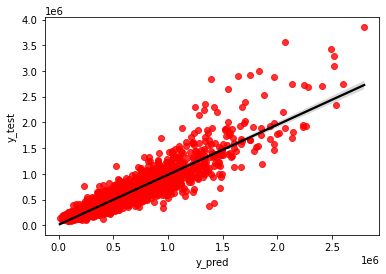

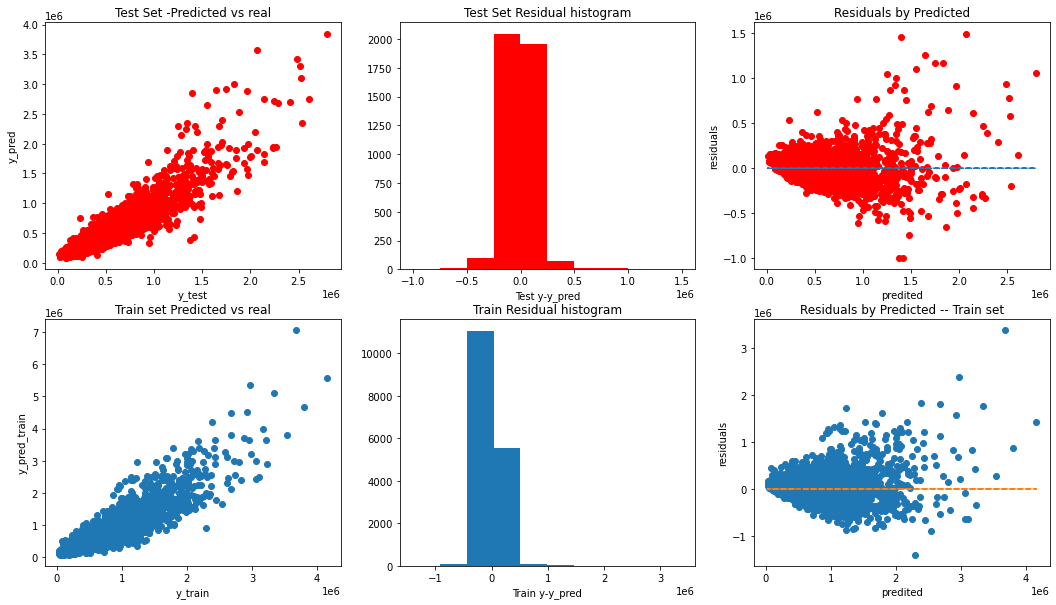

In [2613]:

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plot_train_vs_test(x_train=x_train,y_pred= y_pred_test, x_test=x_test, y_test=y_test, y_pred_train=y_pred_train)

<a id='feature_importance'></a>
<a href='#content'>back to content list</a>

In [2614]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model_l.coef_)
})


zip_mean = features_importances[features_importances['Attribute'].str.startswith('zip') == True]
grade_mean = features_importances[features_importances['Attribute'].str.startswith('grade') == True]
floors_mean = features_importances[features_importances['Attribute'].str.startswith('floor') == True]
condition_mean = features_importances[features_importances['Attribute'].str.startswith('condition') == True]
bedrooms_mean = features_importances[features_importances['Attribute'].str.startswith('bedroom') == True]


features_importances = features_importances[features_importances['Attribute'].str.startswith('zip') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('grade') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('floor') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('condition') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('bedroom') != True]



features_importances.loc[features_importances.index.max() + 1] = ['grade', grade_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['zipcode', zip_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['floors', floors_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['condition', condition_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['bedrooms', bedrooms_mean['Importance'].values.mean()]


features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,waterfront,808298.846100
8,grade,345375.966219
6,lat,236419.615150
9,zipcode,145994.565793
11,condition,80902.350209
10,floors,43287.511256
0,bathrooms,31548.164176
12,bedrooms,26896.748315
4,sqft_basement,22210.906652
5,yr_built,611.542842


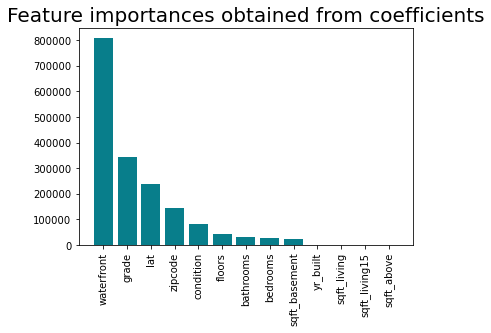

In [2615]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [2617]:
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred_test)
print(R2_train)
print(R2_test)

0.8251494326111206
0.8320578117480257
